In [1]:
#importing libraries that is required for the project
import requests
import json
import pandas as pd
import re 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering:

For this project there are three data sets to be gathered:
--
1-Twitter-archive-enchanced.csv
--
2-image-predictions.tsv
--
3-twitter_api.py
--
4-tweet-json.text and tweet-json.csv
--

1-Twitter_archive_enchanced.csv
--
**This file is downloaded manually by clicking on the link provided by the udacity.**

In [2]:
#gathering twitter-archive-enhanced.csv file to twitter_archive
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

# 2-image_predictions.tsv
**This file is downloaded programmatically using the requests libarary. The url was provided in the udacity portal.**

In [3]:
#gathering image predictions data from the udacity portal using request library and storing the data into the image-predictions.tsv file
image_request=requests.get(" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(image_request.content)

In [4]:
#gathered data is then stored into image_predict
image_predict=pd.read_csv('image-predictions.tsv',sep='\t')

3-twitter_api.py
--
**this method is used to scrape the data from the twitter website using the twitter api.**
**here is the code for it:**
**
import tweepy

from tweepy import OAuthHandler

import json

from timeit import default_timer as timer




consumer_key = 'HIDDEN'

consumer_secret = 'HIDDEN'

access_token = 'HIDDEN'

access_secret = 'HIDDEN'



auth = OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)



api = tweepy.API(auth, wait_on_rate_limit=True)



tweet_ids = df_1.tweet_id.values

len(tweet_ids)



count = 0

fails_dict = {}

start = timer()



with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:



        count += 1
        
        print(str(count) + ": " + str(tweet_id))
        
        try:
            
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            
            print("Success")
            
            json.dump(tweet._json, outfile)
            
            outfile.write('\n')
        
        except tweepy.TweepError as e:
            
            print("Fail")
            
            fails_dict[tweet_id] = e
            
            pass



end = timer()

print(end - start)

print(fails_dict)

# 3-tweet_json.text and tweet_json.csv

**For this part,Instead of using thw twitter Api i am going to use the tweet_json file from the udacity.using requests library we are going to download data from the udacity portal**

In [5]:
#gathering tweet-json.txt data from the udacity portal using request library and storing the data into the tweet-json.txt file
request=requests.get('https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt')

In [6]:
with open('tweet-json.txt','wb') as file:
    file.write(request.content)

In [7]:
#extracting the data from the tweet-json.txt file and appending all the extracted data into tweet-json.csv file
tweets_list=[]
with open('tweet-json.txt') as f:
    for data in f:
        status=json.loads(data)
        created_at=status['created_at']
        id_str=status['id_str']
        full_text=status['full_text']
        retweet_count=status['retweet_count']
        favorite_count=status['favorite_count']
        source=status['source']
        tweets_list.append({'id_str':id_str,
                            'created_at':created_at,
                            'source':source,
                            'full_text':full_text,
                            'retweet_count':retweet_count,
                            'favorite_count':favorite_count,
                            })
        tweets=pd.DataFrame(tweets_list,columns=['id_str','created_at','source','full_text','retweet_count','favorite_count'])
        tweets.to_csv('tweet-json.csv',index=False)

In [8]:
#tweet_json.csv file to tweet_json
tweet_json=pd.read_csv('tweet-json.csv')

# Accessing:

Here we are going to access all the data sets that has been gathered above.
--

In [9]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
tweet_json.head()

,id_str,created_at,source,full_text,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,9774,41048


Now we gonna create a copy file for all the files:
--

In [36]:
#getting a copy of all the datas
image_predict_clean=image_predict.copy()
tweet_json_clean=tweet_json.copy()
twitter_archive_clean=twitter_archive.copy()

In [37]:
image_predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [38]:
tweet_json_clean.head()

,id_str,created_at,source,full_text,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,9774,41048


In [39]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [40]:
tweet_json_clean.shape

(2354, 6)

In [41]:
image_predict_clean.shape

(2075, 12)

In [42]:
twitter_archive_clean.shape

(2356, 17)

In [43]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
id_str            2354 non-null int64
created_at        2354 non-null object
source            2354 non-null object
full_text         2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3), object(3)
memory usage: 110.4+ KB


In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [46]:
image_predict_clean.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [47]:
tweet_json_clean.isnull().sum()

id_str            0
created_at        0
source            0
full_text         0
retweet_count     0
favorite_count    0
dtype: int64

In [48]:
image_predict_clean.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [52]:
#Extracting ratings(numerator) from the full_text column,filling the empty rows to '0' value and converting the value to int
tweet_json_clean['rating_numerator']=tweet_json_clean.full_text.str.extract('(\d+)/(10)',expand=True).fillna(0.0)

In [53]:
#Extracting ratings(denominator) from the full_text column,filling the empty rows to '0' value and converting the value to int
tweet_json_clean['rating_denominator']=tweet_json_clean.full_text.str.extract('(10)',expand=True).fillna(0.0)

In [54]:
#Extracting dog stage(doggo) from full_text column from each users
tweet_json_clean['doggo']=tweet_json_clean.full_text.str.extract('(doggo)',expand=True)

In [55]:
#Extracting dog stage(floofer) from full_text column from each users
tweet_json_clean['floofer']=tweet_json_clean.full_text.str.extract('(floofer)',expand=True)

In [56]:
#Extracting dog stage(pupper) from full_text column from each users
tweet_json_clean['pupper']=tweet_json_clean.full_text.str.extract('(pupper)',expand=True)

In [57]:
#Extracting dog stage(puppo) from full_text column from each users
tweet_json_clean['puppo']=tweet_json_clean.full_text.str.extract('(puppo)',expand=True)

In [59]:
#Extracting link/webpage from full_text column from each users
tweet_json_clean['user_link']=tweet_json_clean.full_text.str.extract('(https://t.co/+(\w+\S+))')

In [60]:
#checking the extracted data from tweet_json_clean
tweet_json_clean.head(10)

,id_str,created_at,source,full_text,retweet_count,favorite_count,rating_denominator,rating_numerator,doggo,floofer,pupper,puppo,user_link
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,8853,39467,10,13,NaN,NaN,NaN,NaN,https://t.co/MgUWQ76dJU
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,6514,33819,10,13,NaN,NaN,NaN,NaN,https://t.co/0Xxu71qeIV
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,4328,25461,10,12,NaN,NaN,NaN,NaN,https://t.co/wUnZnhtVJB
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,8964,42908,10,13,NaN,NaN,NaN,NaN,https://t.co/tD36da7qLQ
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,9774,41048,10,12,NaN,NaN,NaN,NaN,https://t.co/AtUZn91f7f
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,3261,20562,10,13,NaN,NaN,NaN,NaN,https://t.co/kQ04fDDRmh
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,2158,12041,10,13,NaN,NaN,NaN,NaN,https://t.co/Zr4hWfAs1H
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,16716,56848,10,13,NaN,NaN,NaN,NaN,https://t.co/v0nONBcwxq
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,4429,28226,10,13,NaN,NaN,NaN,NaN,https://t.co/9TwLuAGH0b
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,7711,32467,10,14,doggo,NaN,NaN,NaN,https://t.co/t1bfwz5S2A


In [61]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 13 columns):
id_str                2354 non-null int64
created_at            2354 non-null object
source                2354 non-null object
full_text             2354 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
rating_denominator    2354 non-null object
rating_numerator      2354 non-null object
doggo                 98 non-null object
floofer               4 non-null object
pupper                271 non-null object
puppo                 37 non-null object
user_link             2225 non-null object
dtypes: int64(3), object(10)
memory usage: 239.2+ KB


# Cleaning:

Quality:
--
1-we have found that there are 66 duplicate values in th jpg_url column drop all those rows.

2-there are some missing decimal number that are not correctly extracted from the full_text column.

3-rating_numerator and rating_denominator are currently in str type to be converted to float.

4-convert all the Nan value to string None for the columns(doggo,floofer,puppo,pupper,user_links)in order to drop all the Nan values

5-created_at column is currently an object need to be converted to timestamp and change the column name to timestamp

6-store id_str values to tweet_id and drop id_str column.

7-drop all retweets in the full_text column.

8-after mergeing the data sets the tweet_id need to be converted to str.

9-Drop all Nan values

10-after merging img_num column is in the float to be converted to int

11-extracting the dog stages from the full_text column and droping the doggo,floofer,pupper and puppo columns.

12-replacment of None to np.Nan for column dog and conf and changing the type of conf column to float64

13-after creating the master data the tweet_id is tyep int to be converted to str.

14-drop all retweets in the full_text column

Tidiness:
--
1-merge the datasets tweet_json_clean and image_predict_clean.

2-create the merged dataset into one master dataset.

Define:
--

**1-we have found that there are 66 duplicate values in th jpg_url column drop all those rows.**

Code:
--

In [62]:
#checking the number of duplicate values in the jpg_url column from the image_predict_clean 
image_predict_clean[image_predict_clean.duplicated('jpg_url',False)].count()

tweet_id    132
jpg_url     132
img_num     132
p1          132
p1_conf     132
p1_dog      132
p2          132
p2_conf     132
p2_dog      132
p3          132
p3_conf     132
p3_dog      132
dtype: int64

In [63]:
image_predict_clean[image_predict_clean.duplicated('jpg_url',False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


In [64]:
#dropping all the duplicate values
image_predict_clean.drop_duplicates('jpg_url',keep='first',inplace=True)

Test:
--

In [65]:
#checking whether the duplicate values are dropped or not
image_predict_clean[image_predict_clean.duplicated('jpg_url',False)].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [66]:
image_predict_clean[image_predict_clean.duplicated('jpg_url',False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**create two columns from the image_predict_clean where pn_dog is true then append the true dog to the columns:**

In [67]:
#creating two columns dog and conf these two columns extract the data from the columns p1_dog,p2_dog and p3_dog 
#which has true value in the dog and its confidence level in conf
dog=[]
conf=[]


def p(image_predict_clean):
    if image_predict_clean.p1_dog==True:
        dog.append(image_predict_clean.p1)
        conf.append(image_predict_clean.p1_conf)
    elif image_predict_clean.p2_dog==True:
        dog.append(image_predict_clean.p2)
        conf.append(image_predict_clean.p2_conf)
    elif image_predict_clean.p3_dog==True:
        dog.append(image_predict_clean.p3)
        conf.append(image_predict_clean.p3_conf)
    else:
        dog.append('None')
        conf.append('None')
image_predict_clean.apply(p,axis=1)

image_predict_clean['dog']=dog
image_predict_clean['conf']=conf

In [68]:
image_predict_clean.dog.value_counts()

None                           318
golden_retriever               158
Labrador_retriever             108
Pembroke                        95
Chihuahua                       91
pug                             63
toy_poodle                      51
chow                            48
Samoyed                         42
Pomeranian                      42
malamute                        33
French_bulldog                  31
Chesapeake_Bay_retriever        31
cocker_spaniel                  30
miniature_pinscher              25
Eskimo_dog                      22
Staffordshire_bullterrier       21
German_shepherd                 21
Cardigan                        21
Shih-Tzu                        20
beagle                          20
Siberian_husky                  20
Shetland_sheepdog               19
Maltese_dog                     19
Rottweiler                      19
kuvasz                          19
Lakeland_terrier                18
Italian_greyhound               17
basset              

In [69]:
image_predict_clean.conf

0         0.465074
1         0.506826
2         0.596461
3         0.408143
4         0.560311
5         0.651137
6             None
7         0.692517
8       0.00795896
9         0.201493
10         0.77593
11        0.503672
12        0.260857
13        0.489814
14        0.195217
15         0.58233
16        0.298617
17            None
18            None
19        0.176053
20        0.857531
21            None
22        0.278407
23        0.858744
24        0.336874
25            None
26        0.326467
27        0.978108
28        0.529139
29            None
           ...    
2044      0.943575
2045      0.999201
2046          None
2047      0.309706
2048      0.793469
2049      0.733942
2050      0.330741
2051      0.809197
2052          None
2053      0.821664
2054      0.995026
2056      0.700377
2057       0.46976
2058      0.714719
2059      0.626152
2060      0.953442
2061       0.99165
2062      0.966327
2063      0.377417
2064      0.957979
2065      0.511319
2066      0.

In [70]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dog         2009 non-null object
conf        2009 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 194.2+ KB


In [71]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dog         2009 non-null object
conf        2009 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 194.2+ KB


# Quality:

Define:
--

**2-there are some missing decimal number that are not correctly extracted from the full_text column.**

Code:
--

In [72]:
#extracts the decimals value from the numerator
ratings_numerator_index=[]
ratings_numerator_value=[]

for index,numerator in tweet_json_clean['full_text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', numerator)):
        ratings_numerator_index.append(index)
        ratings_numerator_value.append(re.search('\d+\.\d+', numerator).group())
ratings_numerator_index

[44, 339, 694, 762, 1687, 1710]

In [73]:
ratings_numerator_value

['13.5', '9.75', '9.75', '11.27', '9.5', '11.26']

In [75]:
#storing the decimal values
tweet_json_clean.loc[ratings_numerator_index[0],'rating_numerator'] = ratings_numerator_value[0]
tweet_json_clean.loc[ratings_numerator_index[1],'rating_numerator'] = ratings_numerator_value[1]
tweet_json_clean.loc[ratings_numerator_index[2],'rating_numerator'] = ratings_numerator_value[2]
tweet_json_clean.loc[ratings_numerator_index[3],'rating_numerator'] = ratings_numerator_value[3]

Test:
--

In [76]:
tweet_json_clean.loc[44]

id_str                                               883482846933004288
created_at                               Sat Jul 08 00:28:19 +0000 2017
source                <a href="http://twitter.com/download/iphone" r...
full_text             This is Bella. She hopes her smile made you sm...
retweet_count                                                     10407
favorite_count                                                    46860
rating_denominator                                                   10
rating_numerator                                                   13.5
doggo                                                               NaN
floofer                                                             NaN
pupper                                                              NaN
puppo                                                               NaN
user_link                                       https://t.co/qjrljjt948
Name: 44, dtype: object

In [77]:
tweet_json_clean.loc[339]

id_str                                               832215909146226688
created_at                               Thu Feb 16 13:11:49 +0000 2017
source                <a href="http://twitter.com/download/iphone" r...
full_text             RT @dog_rates: This is Logan, the Chow who liv...
retweet_count                                                      7069
favorite_count                                                        0
rating_denominator                                                   10
rating_numerator                                                   9.75
doggo                                                               NaN
floofer                                                             NaN
pupper                                                              NaN
puppo                                                               NaN
user_link                                          https://t.co/yBO5wu…
Name: 339, dtype: object

In [78]:
tweet_json_clean.loc[694]

id_str                                               786709082849828864
created_at                               Thu Oct 13 23:23:56 +0000 2016
source                <a href="http://twitter.com/download/iphone" r...
full_text             This is Logan, the Chow who lived. He solemnly...
retweet_count                                                      7069
favorite_count                                                    20296
rating_denominator                                                   10
rating_numerator                                                   9.75
doggo                                                               NaN
floofer                                                             NaN
pupper                                                              NaN
puppo                                                               NaN
user_link                                       https://t.co/yBO5wuqaPS
Name: 694, dtype: object

In [79]:
tweet_json_clean.loc[762]

id_str                                               778027034220126208
created_at                               Tue Sep 20 00:24:34 +0000 2016
source                <a href="http://twitter.com/download/iphone" r...
full_text             This is Sophie. She's a Jubilant Bush Pupper. ...
retweet_count                                                      1885
favorite_count                                                     7320
rating_denominator                                                   10
rating_numerator                                                  11.27
doggo                                                               NaN
floofer                                                             NaN
pupper                                                              NaN
puppo                                                               NaN
user_link                                       https://t.co/QFaUiIHxHq
Name: 762, dtype: object

In [80]:
tweet_json_clean.loc[1687]

id_str                                               681340665377193984
created_at                               Mon Dec 28 05:07:27 +0000 2015
source                <a href="http://twitter.com/download/iphone" r...
full_text             I've been told there's a slight possibility he...
retweet_count                                                       313
favorite_count                                                     1803
rating_denominator                                                   10
rating_numerator                                                      5
doggo                                                               NaN
floofer                                                             NaN
pupper                                                              NaN
puppo                                                               NaN
user_link                                                           NaN
Name: 1687, dtype: object

In [81]:
tweet_json_clean.loc[1710]

id_str                                               680494726643068929
created_at                               Fri Dec 25 21:06:00 +0000 2015
source                <a href="http://twitter.com/download/iphone" r...
full_text             Here we have uncovered an entire battalion of ...
retweet_count                                                       542
favorite_count                                                     1879
rating_denominator                                                   10
rating_numerator                                                     26
doggo                                                               NaN
floofer                                                             NaN
pupper                                                           pupper
puppo                                                               NaN
user_link                                       https://t.co/eNm2S6p9BD
Name: 1710, dtype: object

In [82]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 13 columns):
id_str                2354 non-null int64
created_at            2354 non-null object
source                2354 non-null object
full_text             2354 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
rating_denominator    2354 non-null object
rating_numerator      2354 non-null object
doggo                 98 non-null object
floofer               4 non-null object
pupper                271 non-null object
puppo                 37 non-null object
user_link             2225 non-null object
dtypes: int64(3), object(10)
memory usage: 239.2+ KB


In [83]:
tweet_json_clean[tweet_json_clean['id_str']==883482846933004288]

,id_str,created_at,source,full_text,retweet_count,favorite_count,rating_denominator,rating_numerator,doggo,floofer,pupper,puppo,user_link
44,883482846933004288,Sat Jul 08 00:28:19 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,10407,46860,10,13.5,NaN,NaN,NaN,NaN,https://t.co/qjrljjt948


In [84]:
tweet_json_clean[tweet_json_clean['id_str']==832215909146226688]

,id_str,created_at,source,full_text,retweet_count,favorite_count,rating_denominator,rating_numerator,doggo,floofer,pupper,puppo,user_link
339,832215909146226688,Thu Feb 16 13:11:49 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7069,0,10,9.75,NaN,NaN,NaN,NaN,https://t.co/yBO5wu…


Define:
    --

**3-rating_numerator and rating_denominator are currently in str type to be converted to float.:**



Code:
--

In [85]:
#converting the data type to float for rating_numerator and rating_denominator columns
tweet_json_clean['rating_numerator']=tweet_json_clean['rating_numerator'].astype('float64')

In [86]:
tweet_json_clean['rating_denominator']=tweet_json_clean['rating_denominator'].astype('float64')

Test:
--

In [87]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 13 columns):
id_str                2354 non-null int64
created_at            2354 non-null object
source                2354 non-null object
full_text             2354 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
rating_denominator    2354 non-null float64
rating_numerator      2354 non-null float64
doggo                 98 non-null object
floofer               4 non-null object
pupper                271 non-null object
puppo                 37 non-null object
user_link             2225 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 239.2+ KB


Define:
    --

**4-convert all the Nan value to string None for the columns(doggo,floofer,puppo,pupper,user_links)in order to drop all the Nan values:**



Code:
--

In [88]:
#converting the np.NaN to string None in order to drop the NaN values of other columns
tweet_json_clean.doggo=tweet_json_clean.doggo.replace(np.NaN, 'None')
tweet_json_clean.floofer=tweet_json_clean.floofer.replace(np.NaN, 'None')
tweet_json_clean.pupper=tweet_json_clean.pupper.replace(np.NaN, 'None')
tweet_json_clean.puppo=tweet_json_clean.puppo.replace(np.NaN, 'None')
tweet_json_clean.user_link=tweet_json_clean.user_link.replace(np.NaN, 'None')

Test:
--

In [89]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 13 columns):
id_str                2354 non-null int64
created_at            2354 non-null object
source                2354 non-null object
full_text             2354 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
rating_denominator    2354 non-null float64
rating_numerator      2354 non-null float64
doggo                 2354 non-null object
floofer               2354 non-null object
pupper                2354 non-null object
puppo                 2354 non-null object
user_link             2354 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 239.2+ KB


Define:
--

**5-created_at column is currently an object need to be converted to timestamp and change the column name to timestamp:**

Code:
--

In [90]:
#renaming the created_at column to timestamp and converting the column to datetime using pd.to_datetime
tweet_json_clean['timestamp']=pd.to_datetime(tweet_json_clean['created_at'])
tweet_json_clean.drop(['created_at'],axis=1,inplace=True)

Test:
--

In [91]:
tweet_json_clean.head(10)

,id_str,source,full_text,retweet_count,favorite_count,rating_denominator,rating_numerator,doggo,floofer,pupper,puppo,user_link,timestamp
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,8853,39467,10.0,13.0,None,None,None,None,https://t.co/MgUWQ76dJU,2017-08-01 16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,6514,33819,10.0,13.0,None,None,None,None,https://t.co/0Xxu71qeIV,2017-08-01 00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,4328,25461,10.0,12.0,None,None,None,None,https://t.co/wUnZnhtVJB,2017-07-31 00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,8964,42908,10.0,13.0,None,None,None,None,https://t.co/tD36da7qLQ,2017-07-30 15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,9774,41048,10.0,12.0,None,None,None,None,https://t.co/AtUZn91f7f,2017-07-29 16:00:24
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,3261,20562,10.0,13.0,None,None,None,None,https://t.co/kQ04fDDRmh,2017-07-29 00:08:17
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,2158,12041,10.0,13.0,None,None,None,None,https://t.co/Zr4hWfAs1H,2017-07-28 16:27:12
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,16716,56848,10.0,13.0,None,None,None,None,https://t.co/v0nONBcwxq,2017-07-28 00:22:40
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,4429,28226,10.0,13.0,None,None,None,None,https://t.co/9TwLuAGH0b,2017-07-27 16:25:51
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,7711,32467,10.0,14.0,doggo,None,None,None,https://t.co/t1bfwz5S2A,2017-07-26 15:59:51


Define:
--

**6-store id_str values to tweet_id and drop id_str column:**

Code:
--

In [93]:
#storing id_str to tweet_id and drops the id_str column

In [92]:
tweet_json_clean['tweet_id']=tweet_json_clean['id_str']
tweet_json_clean.drop('id_str',axis=1,inplace=True)

Test:
--

In [94]:
tweet_json_clean.head()

,source,full_text,retweet_count,favorite_count,rating_denominator,rating_numerator,doggo,floofer,pupper,puppo,user_link,timestamp,tweet_id
0,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,8853,39467,10.0,13.0,None,None,None,None,https://t.co/MgUWQ76dJU,2017-08-01 16:23:56,892420643555336193
1,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,6514,33819,10.0,13.0,None,None,None,None,https://t.co/0Xxu71qeIV,2017-08-01 00:17:27,892177421306343426
2,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,4328,25461,10.0,12.0,None,None,None,None,https://t.co/wUnZnhtVJB,2017-07-31 00:18:03,891815181378084864
3,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,8964,42908,10.0,13.0,None,None,None,None,https://t.co/tD36da7qLQ,2017-07-30 15:58:51,891689557279858688
4,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,9774,41048,10.0,12.0,None,None,None,None,https://t.co/AtUZn91f7f,2017-07-29 16:00:24,891327558926688256


In [95]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 13 columns):
source                2354 non-null object
full_text             2354 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
rating_denominator    2354 non-null float64
rating_numerator      2354 non-null float64
doggo                 2354 non-null object
floofer               2354 non-null object
pupper                2354 non-null object
puppo                 2354 non-null object
user_link             2354 non-null object
timestamp             2354 non-null datetime64[ns]
tweet_id              2354 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 239.2+ KB


Define:
--

**7-drop all retweets in the full_text column.**

Code:
--

In [96]:
#inorder to drop all the retweet values we need to extract the letter RT which indicates Retweets and 
#store it into a column called retweetand then dropping the retweets column
tweet_json_clean['retweet']=tweet_json_clean.full_text.str.extract('(RT)',expand=True)

In [97]:
tweet_json_clean.retweet.value_counts()

RT    190
Name: retweet, dtype: int64

In [98]:
tweet_json_clean[tweet_json_clean['retweet']=='RT']

,source,full_text,retweet_count,favorite_count,rating_denominator,rating_numerator,doggo,floofer,pupper,puppo,user_link,timestamp,tweet_id,retweet
31,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,108,0,10.0,12.0,None,None,None,None,https://t.co/WxwJmvjfxo,2017-07-15 02:45:48,886054160059072513,RT
35,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,19297,0,10.0,13.0,None,None,None,None,https://t.co/SATN4If5H5,2017-07-13 01:35:06,885311592912609280,RT
67,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,7181,0,10.0,14.0,None,None,None,None,None,2017-06-26 00:13:58,879130579576475649,RT
72,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,1349,0,10.0,13.0,None,None,None,None,None,2017-06-24 00:09:53,878404777348136964,RT
73,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6965,0,10.0,11.0,None,None,None,None,https://t.co/i…,2017-06-23 18:17:33,878316110768087041,RT
77,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,83,0,10.0,14.0,None,None,pupper,None,https://t.co/dJx4Gzc50G,2017-06-21 19:36:23,877611172832227328,RT
79,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,5414,27907,10.0,13.0,None,None,None,None,https://t.co/SHRTIo5pxc,2017-06-21 00:06:44,877316821321428993,RT
90,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,15546,0,10.0,12.0,None,None,None,None,None,2017-06-13 01:14:41,874434818259525634,RT
94,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,12518,0,10.0,14.0,None,None,None,None,https://t.co/r28jFx9uyF,2017-06-11 00:25:14,873697596434513921,RT
96,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,1667,0,10.0,12.0,None,None,pupper,None,None,2017-06-10 00:35:19,873337748698140672,RT


In [99]:
tweet_json_clean.drop(tweet_json_clean.loc[tweet_json_clean['retweet']=='RT'].index, inplace=True)

In [100]:
tweet_json_clean[tweet_json_clean['retweet']=='RT']

,source,full_text,retweet_count,favorite_count,rating_denominator,rating_numerator,doggo,floofer,pupper,puppo,user_link,timestamp,tweet_id,retweet


In [101]:
tweet_json_clean.drop('retweet',axis=1,inplace=True)

In [102]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2353
Data columns (total 13 columns):
source                2164 non-null object
full_text             2164 non-null object
retweet_count         2164 non-null int64
favorite_count        2164 non-null int64
rating_denominator    2164 non-null float64
rating_numerator      2164 non-null float64
doggo                 2164 non-null object
floofer               2164 non-null object
pupper                2164 non-null object
puppo                 2164 non-null object
user_link             2164 non-null object
timestamp             2164 non-null datetime64[ns]
tweet_id              2164 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 236.7+ KB


# Tidiness:

Define:
--

**1-merge the datasets tweet_json_clean and image_predict_clean:**

Code:
--

In [103]:
#merge the two datasets tweet_json_clean image_predict_clean with the reference of tweet_id
tweet_json_clean=pd.merge(tweet_json_clean,image_predict_clean,on='tweet_id',how='left')

Test:
--

In [104]:
tweet_json_clean.head()

,source,full_text,retweet_count,favorite_count,rating_denominator,rating_numerator,doggo,floofer,pupper,puppo,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog,conf
0,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,8853,39467,10.0,13.0,None,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None,None
1,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,6514,33819,10.0,13.0,None,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
2,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,4328,25461,10.0,12.0,None,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
3,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,8964,42908,10.0,13.0,None,None,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
4,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,9774,41048,10.0,12.0,None,None,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712


In [105]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2163
Data columns (total 26 columns):
source                2164 non-null object
full_text             2164 non-null object
retweet_count         2164 non-null int64
favorite_count        2164 non-null int64
rating_denominator    2164 non-null float64
rating_numerator      2164 non-null float64
doggo                 2164 non-null object
floofer               2164 non-null object
pupper                2164 non-null object
puppo                 2164 non-null object
user_link             2164 non-null object
timestamp             2164 non-null datetime64[ns]
tweet_id              2164 non-null int64
jpg_url               1986 non-null object
img_num               1986 non-null float64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null object
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1

# Quality:

Define:
--

**7-after mergeing the data sets the tweet_id need to be converted to str.**

Code:
--

In [106]:
#converting the tweet_id to str
tweet_json_clean['tweet_id']=tweet_json_clean['tweet_id'].astype(str)

Test:
--

In [107]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2163
Data columns (total 26 columns):
source                2164 non-null object
full_text             2164 non-null object
retweet_count         2164 non-null int64
favorite_count        2164 non-null int64
rating_denominator    2164 non-null float64
rating_numerator      2164 non-null float64
doggo                 2164 non-null object
floofer               2164 non-null object
pupper                2164 non-null object
puppo                 2164 non-null object
user_link             2164 non-null object
timestamp             2164 non-null datetime64[ns]
tweet_id              2164 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null float64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null object
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                

# Quality:

Define:
--

**8-Drop all Nan values**

Code:
--

In [108]:
#drop all the Nan values in the dataset
tweet_json_clean.isnull().sum()

source                  0
full_text               0
retweet_count           0
favorite_count          0
rating_denominator      0
rating_numerator        0
doggo                   0
floofer                 0
pupper                  0
puppo                   0
user_link               0
timestamp               0
tweet_id                0
jpg_url               178
img_num               178
p1                    178
p1_conf               178
p1_dog                178
p2                    178
p2_conf               178
p2_dog                178
p3                    178
p3_conf               178
p3_dog                178
dog                   178
conf                  178
dtype: int64

In [109]:
tweet_json_clean.dropna(inplace=True)

Test:
--

In [110]:
tweet_json_clean.isnull().sum()

source                0
full_text             0
retweet_count         0
favorite_count        0
rating_denominator    0
rating_numerator      0
doggo                 0
floofer               0
pupper                0
puppo                 0
user_link             0
timestamp             0
tweet_id              0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
dog                   0
conf                  0
dtype: int64

# Quality:

Define:
--

**9-after merging img_num column is in the float to be converted to int:**

Code:
--

In [111]:
#converting the im_num column to int.
tweet_json_clean.isnull().img_num.value_counts()

False    1986
Name: img_num, dtype: int64

In [112]:
tweet_json_clean['img_num']=tweet_json_clean['img_num'].astype('int64')

Test:
--

In [113]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2163
Data columns (total 26 columns):
source                1986 non-null object
full_text             1986 non-null object
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
rating_denominator    1986 non-null float64
rating_numerator      1986 non-null float64
doggo                 1986 non-null object
floofer               1986 non-null object
pupper                1986 non-null object
puppo                 1986 non-null object
user_link             1986 non-null object
timestamp             1986 non-null datetime64[ns]
tweet_id              1986 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null object
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                19

In [114]:
tweet_json_clean.shape

(1986, 26)

In [115]:
tweet_json_clean.isnull().sum()

source                0
full_text             0
retweet_count         0
favorite_count        0
rating_denominator    0
rating_numerator      0
doggo                 0
floofer               0
pupper                0
puppo                 0
user_link             0
timestamp             0
tweet_id              0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
dog                   0
conf                  0
dtype: int64

# Quality:

Define:
--

**10-extracting the dog stages from the full_text column and droping the doggo,floofer,pupper and puppo columns.**

Code:
--

In [116]:
#extracting the dog stages doggo,floofer,puppo and pupper into one common column called dog_stage 
#and drop columns doggo,floofer,pupp0 and pupper
tweet_json_clean['dog_stage']=tweet_json_clean.full_text.str.extract('(doggo|floofer|pupper|puppo)',expand=True)
tweet_json_clean['dog_stage']=tweet_json_clean['dog_stage'].replace(np.NaN,'None')

In [117]:
tweet_json_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

Test:
--

In [118]:
tweet_json_clean.isnull().sum()

source                0
full_text             0
retweet_count         0
favorite_count        0
rating_denominator    0
rating_numerator      0
user_link             0
timestamp             0
tweet_id              0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
dog                   0
conf                  0
dog_stage             0
dtype: int64

# Tidiness:

Define:
--

**2-Rearrangement of columns:**

Code:
--

In [119]:
#rearrangement of columns for great data reading
columns_set=['tweet_id','timestamp','full_text','dog_stage','source','user_link','jpg_url','rating_numerator','rating_denominator','retweet_count','favorite_count','img_num','dog','conf','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']
tweet_json_clean=tweet_json_clean.reindex(columns=columns_set)

Test:
--

In [120]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2163
Data columns (total 23 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns]
full_text             1986 non-null object
dog_stage             1986 non-null object
source                1986 non-null object
user_link             1986 non-null object
jpg_url               1986 non-null object
rating_numerator      1986 non-null float64
rating_denominator    1986 non-null float64
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
img_num               1986 non-null int64
dog                   1986 non-null object
conf                  1986 non-null object
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null object
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null object
p3                    19

Define:
--

**11-replacment of None to np.Nan for column dog and conf and changing the type of conf column to float64**

Code:
--

In [121]:
#replacment of None to np.Nan for column dog and conf and changing the type of conf column to float64
tweet_json_clean['dog']=tweet_json_clean['dog'].replace('None',np.NaN)

In [122]:
tweet_json_clean['conf']=tweet_json_clean['conf'].replace('None',np.NaN)

In [123]:
tweet_json_clean['conf']=tweet_json_clean['conf'].astype('float64')

Test:
--

In [124]:
tweet_json_clean.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2163
Data columns (total 23 columns):
tweet_id              1986 non-null bool
timestamp             1986 non-null bool
full_text             1986 non-null bool
dog_stage             1986 non-null bool
source                1986 non-null bool
user_link             1986 non-null bool
jpg_url               1986 non-null bool
rating_numerator      1986 non-null bool
rating_denominator    1986 non-null bool
retweet_count         1986 non-null bool
favorite_count        1986 non-null bool
img_num               1986 non-null bool
dog                   1986 non-null bool
conf                  1986 non-null bool
p1                    1986 non-null bool
p1_conf               1986 non-null bool
p1_dog                1986 non-null bool
p2                    1986 non-null bool
p2_conf               1986 non-null bool
p2_dog                1986 non-null bool
p3                    1986 non-null bool
p3_conf               1986 non-n

In [125]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2163
Data columns (total 23 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns]
full_text             1986 non-null object
dog_stage             1986 non-null object
source                1986 non-null object
user_link             1986 non-null object
jpg_url               1986 non-null object
rating_numerator      1986 non-null float64
rating_denominator    1986 non-null float64
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
img_num               1986 non-null int64
dog                   1678 non-null object
conf                  1678 non-null float64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null object
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null object
p3                    1

In [126]:
tweet_json_clean.isnull().sum()

tweet_id                0
timestamp               0
full_text               0
dog_stage               0
source                  0
user_link               0
jpg_url                 0
rating_numerator        0
rating_denominator      0
retweet_count           0
favorite_count          0
img_num                 0
dog                   308
conf                  308
p1                      0
p1_conf                 0
p1_dog                  0
p2                      0
p2_conf                 0
p2_dog                  0
p3                      0
p3_conf                 0
p3_dog                  0
dtype: int64

# Tidiness:

Define:
--

**2-merge the datasets to one master data set.**

Code:
--

In [127]:
#the cleaned dataset to twitter-archive-master.csv file
tweet_json_clean.to_csv('twitter_archive_master.csv',index=False)

Test:
--

In [128]:
tweet_master=pd.read_csv('twitter_archive_master.csv')
tweet_master.head(10)

,tweet_id,timestamp,full_text,dog_stage,source,user_link,jpg_url,rating_numerator,rating_denominator,retweet_count,...,conf,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,None,"<a href=""http://twitter.com/download/iphone"" r...",https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,13.0,10.0,8853,...,NaN,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,None,"<a href=""http://twitter.com/download/iphone"" r...",https://t.co/0Xxu71qeIV,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,13.0,10.0,6514,...,0.323581,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,None,"<a href=""http://twitter.com/download/iphone"" r...",https://t.co/wUnZnhtVJB,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,12.0,10.0,4328,...,0.716012,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,None,"<a href=""http://twitter.com/download/iphone"" r...",https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,13.0,10.0,8964,...,0.168086,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,None,"<a href=""http://twitter.com/download/iphone"" r...",https://t.co/AtUZn91f7f,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,12.0,10.0,9774,...,0.555712,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,None,"<a href=""http://twitter.com/download/iphone"" r...",https://t.co/kQ04fDDRmh,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,13.0,10.0,3261,...,0.425595,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,None,"<a href=""http://twitter.com/download/iphone"" r...",https://t.co/Zr4hWfAs1H,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,13.0,10.0,2158,...,0.341703,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,None,"<a href=""http://twitter.com/download/iphone"" r...",https://t.co/v0nONBcwxq,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,13.0,10.0,16716,...,0.566142,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,None,"<a href=""http://twitter.com/download/iphone"" r...",https://t.co/9TwLuAGH0b,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,13.0,10.0,4429,...,0.487574,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,doggo,"<a href=""http://twitter.com/download/iphone"" r...",https://t.co/t1bfwz5S2A,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,14.0,10.0,7711,...,0.511319,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [129]:
tweet_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 23 columns):
tweet_id              1986 non-null int64
timestamp             1986 non-null object
full_text             1986 non-null object
dog_stage             1986 non-null object
source                1986 non-null object
user_link             1986 non-null object
jpg_url               1986 non-null object
rating_numerator      1986 non-null float64
rating_denominator    1986 non-null float64
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
img_num               1986 non-null int64
dog                   1678 non-null object
conf                  1678 non-null float64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null 

# Quality:

Define:
--

**12-after creating the master data the tweet_id is tyep int to be converted to str.**

Code:
--

In [130]:
#after creating the master dataset the tweet_id column is coverted to int that need to be converted to str
tweet_master['tweet_id']=tweet_master['tweet_id'].astype(str)

**Test:**
--

In [131]:
tweet_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 23 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null object
full_text             1986 non-null object
dog_stage             1986 non-null object
source                1986 non-null object
user_link             1986 non-null object
jpg_url               1986 non-null object
rating_numerator      1986 non-null float64
rating_denominator    1986 non-null float64
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
img_num               1986 non-null int64
dog                   1678 non-null object
conf                  1678 non-null float64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null

## Analyze and Visualize

**First Insight:**

**Retweet count v/s Favourite count:**

C:\Users\Prem Kumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Prem Kumar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


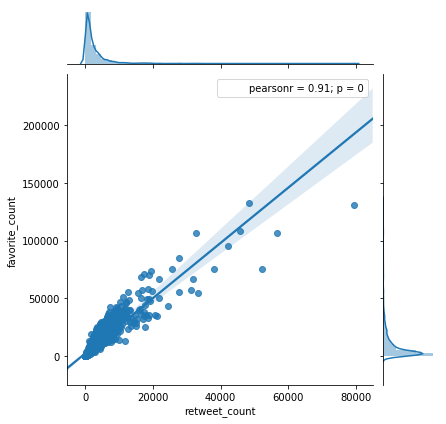

In [133]:
g=sb.jointplot('retweet_count','favorite_count',data=tweet_master,kind='reg');


**According to the above visualization the favorite count and retweet count are rapidly increasing at the start of the point.But majorly the data losses at an assumption of 30000 favorite count and 15000 retweet count.**

**Second Insight:**

**Rated Dogs:**

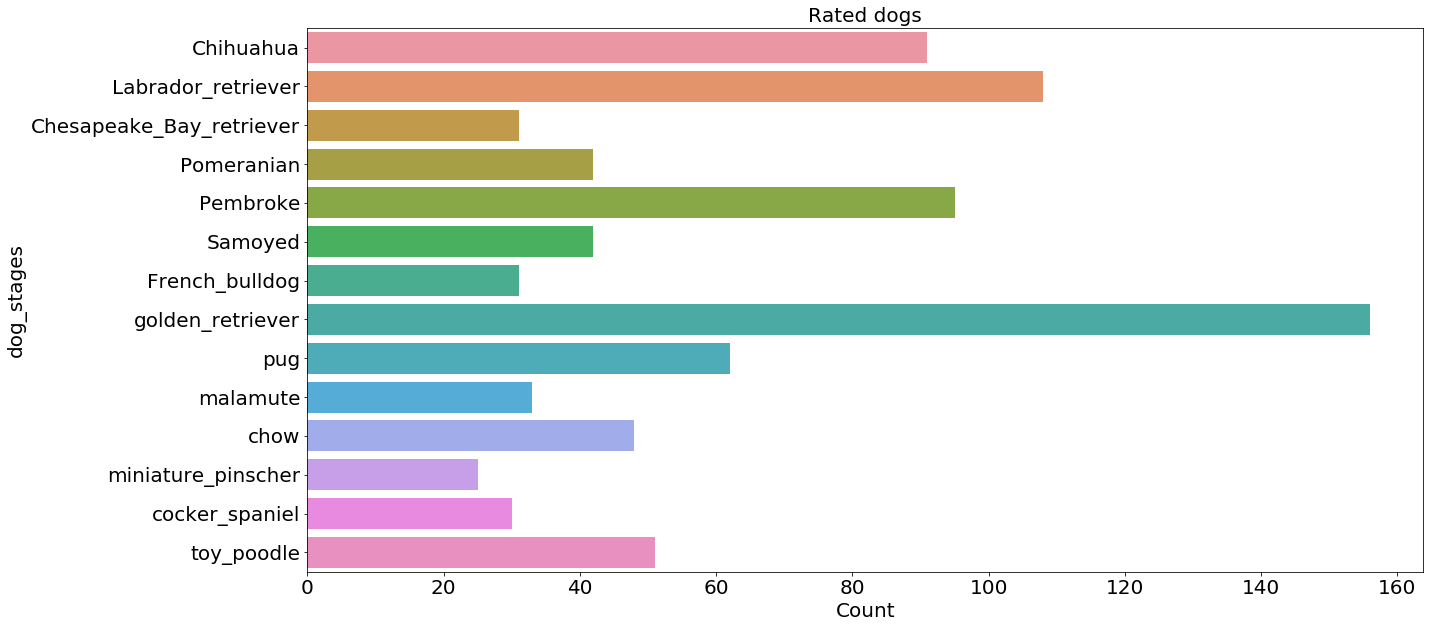

In [134]:
dog=tweet_master.groupby('dog').filter(lambda dog:len(dog)>=25)
plt.figure(figsize=(20,10))
sb.countplot(data = dog, y = 'dog');
plt.xticks(fontsize=20);
plt.yticks(fontsize=20)
plt.xlabel('Count',fontsize=20);
plt.ylabel('dog_stages',fontsize=20);
plt.title('Rated dogs',fontsize=20);

**As per the visualization above the highest dog stage is gloden retriever and lowest dog stage is the Miniature pinscher.**

**The Golden Retriever is the most commonly used by the peoples.where the count of it is 158.**

In [135]:
tweet_master.dog.value_counts()

golden_retriever                  156
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Staffordshire_bullterrier          20
Shih-Tzu                           20
beagle                             20
Siberian_husky                     20
Maltese_dog                        19
Rottweiler                         19
Lakeland_terrier                   18
kuvasz                             18
Shetland_sheepdog                  18
basset      

**Third Insight:**

**Confidence level of the dogs**

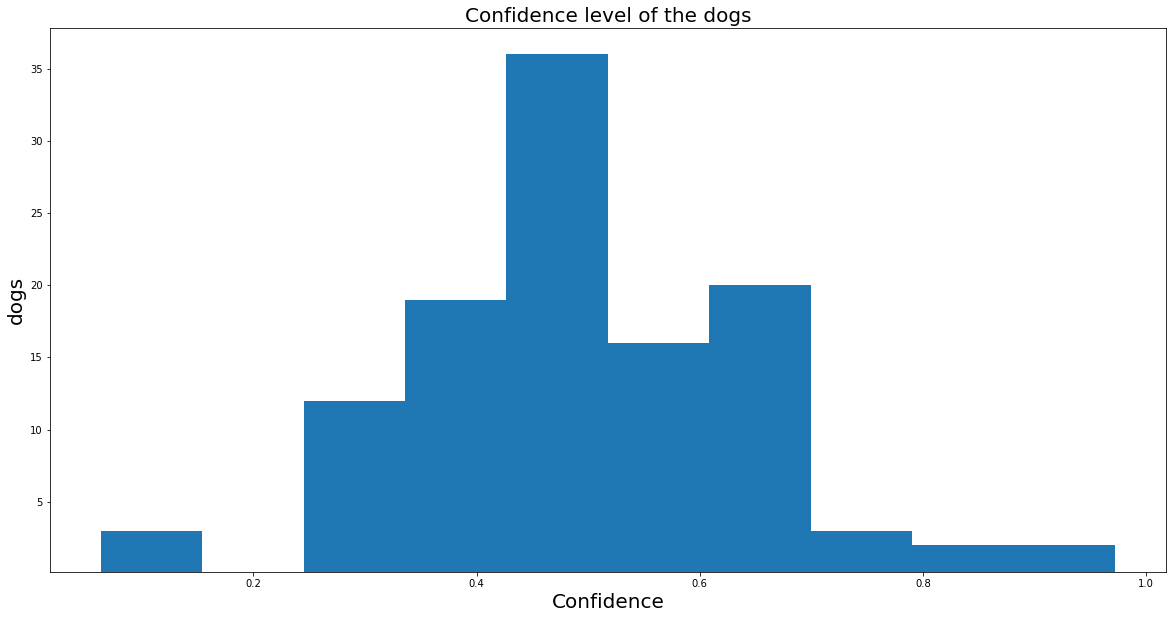

In [136]:
dog_stage=tweet_master.groupby('dog')['conf'].mean()
plt.figure(figsize=(20,10))
plt.hist(dog_stage);
plt.ylim(0.150);
plt.xlabel('Confidence',fontsize=20);
plt.ylabel('dogs',fontsize=20);
plt.title('Confidence level of the dogs',fontsize=20);

**35 number of dogs have the medium confidence level of 0.5, one or two dogs have very low confidence level between 0-0.2 and high confidence level between 0.8-1.0**

**Fourth Insight:**

**Count of dog stages**

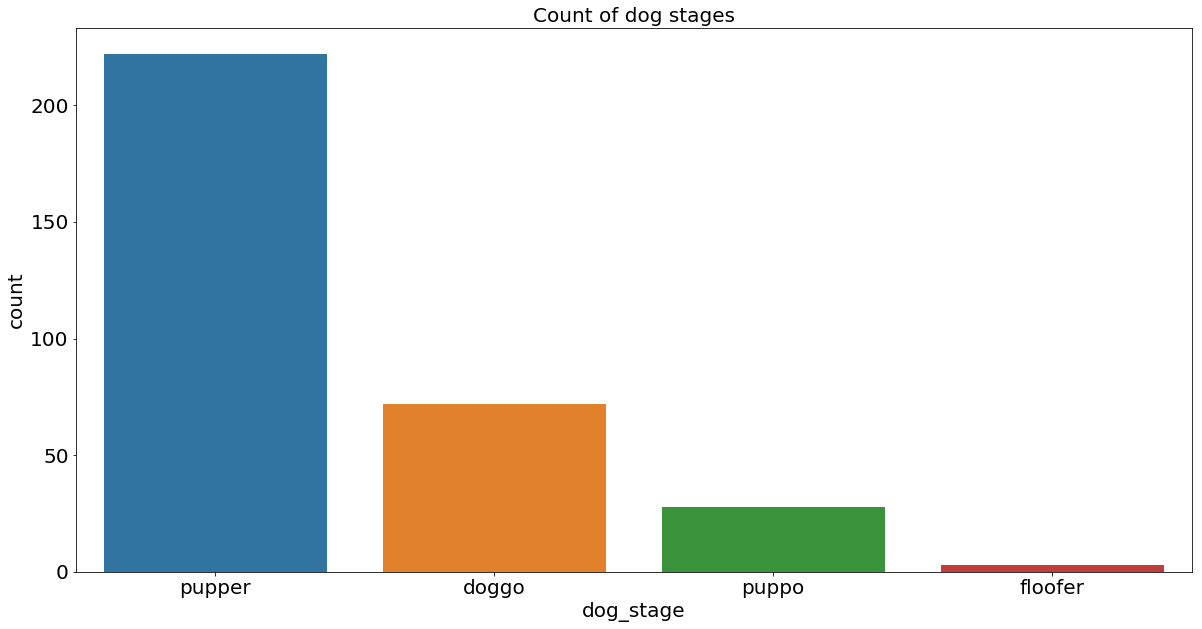

In [137]:
tweet_master['dog_stage']=tweet_master.dog_stage.replace('None',np.NaN)
dog_stage=tweet_master.dog_stage.value_counts().index
plt.figure(figsize=(20,10));
sb.countplot(data=tweet_master,x='dog_stage',order=dog_stage);
plt.xlabel('dog_stage',fontsize=20);
plt.ylabel('count',fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.title('Count of dog stages',fontsize=20);

# Note:

**Here i have used the tweet-json file i order to practice the wranglind of a data.here i have not used the twitter-archive-enchanced.csv file**